## Chamberlain - Figure 1 Scripts

### Description
Recreating Figure 1a and Figure 2b, MSA protein alignments, from Peng et al. (2015)
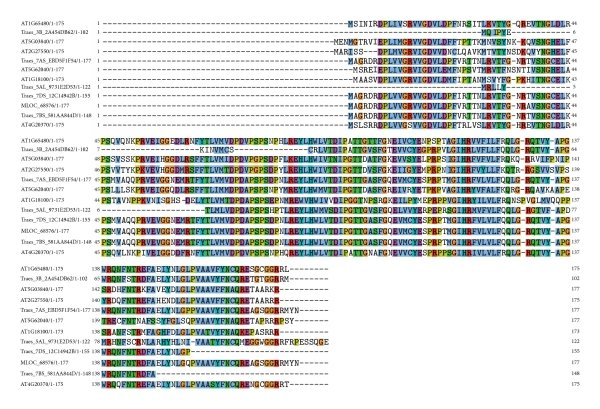

### Dependencies
Install packages in Linux terminal: `$ sudo apt install git` 

Clone project respository: `$ git clone https://github.com/chamberwin/BCB546-Spring2022_Ice_Cream_Bean.git`

Install packages in Jupyter: `conda install biopython`

### Authors
Heather Chamberlain-Irwin

### Date 
May 24, 2022

### Step 1: Create FASTA files for Fig1a and Fig1b

* Using the Arabidopsis, barley, and wheat fasta files, create one .fasta file with all sequences as a dictionary
* Create Fig1a and Fig1b gene lists as iterable objects
* Write new .fasta files with sequences just for the genes in Fig1a and Fig1b

In [30]:
from Bio.Seq import Seq
from Bio import SeqIO
from Bio.SeqRecord import SeqRecord

In [26]:
cd Results/Fig_1/Output

/home/heather/BCB546-Spring2022_Ice_Cream_Bean/Results/Fig_1/Output


In [27]:
#Concatenate fastas into one to iterate later
cat Fig_1_Arabidopsis_Protein.fasta Fig_1_Barley_Protein.fasta Fig_1_Wheat_Protein.fasta > All_Species_Seq.fasta

In [28]:
#Create new text file to put gene list for later extraction https://www.geeksforgeeks.org/create-an-empty-file-using-python/
with open('Fig1a_Gene_List.txt', 'w') as fp:
    pass

Created a list for Fig1a to make into .txt file. Decided to use the Identifier instead of Gene ID because there are three iterations of the MLOC gene.

'AT1G71692.1','MLOC_53973.1','MLOC_53973.2','MLOC_53973.3','Traes_7AL_67921A952.2','Traes_7BL_9BCF391CF.2','Traes_7DL_CAF83263E.2','Traes_2BL_E0978B1BC.1','Traes_2DL_71F120931.1'

In [29]:
#Create list of iteratable objects using write(line) https://www.pythontutorial.net/python-basics/python-write-text-file/
lines = ['AT1G71692.1','MLOC_53973.1','MLOC_53973.2','MLOC_53973.3','Traes_7AL_67921A952.2','Traes_7BL_9BCF391CF.2','Traes_7DL_CAF83263E.2','Traes_2BL_E0978B1BC.1','Traes_2DL_71F120931.1']
with open('Fig1a_Gene_List.txt', 'w') as f:
    for line in lines:
        f.write(line)
        f.write('\n')

In [31]:
#Create dictionary to iterate over all species' seqeunces https://biopython.org/docs/1.75/api/Bio.SeqIO.html
record_dict = SeqIO.to_dict(SeqIO.parse("All_Species_Seq.fasta", "fasta"))
len(record_dict)

20

In [32]:
#Create new file to put Fig1a Sequences into
with open('Fig1a_Seq.fasta', 'w') as fp:
    pass

In [33]:
#Iterate over All_Species_Seq for Fig1a genes from "lines" list https://stackoverflow.com/questions/70002399/extract-fasta-files-from-id-list-with-biopython
wanted_filename = "Fig1a_Gene_List.txt"           
input_filename = "All_Species_Seq.fasta"
output_filename = "Fig1a_Seq.fasta"
count = 0
total = 0
output_handle = open(output_filename, "w")


In [34]:
with open(wanted_filename) as f:                       
    wanted_ids = [l[0:-1] for l in f]   

In [35]:
for record in SeqIO.parse(input_filename, "fasta"):
    total = total + 1
    if record.id in wanted_ids:
        count = count + 1
        output_handle.write(record.format("fasta"))
output_handle.close()
print(str(count) + " records selected out of " + str(total))

9 records selected out of 20


In [36]:
#Repeat for Fig1b
with open('Fig1b_Gene_List.txt', 'w') as fp:
    pass

List for Fig1b_Gene_List: 
    'AT1G65480.1','AT5G03840.1','AT2G27550.1','Traes_7AS_EBD5F1F54.1','AT5G62040.1','AT1G18100.1','Traes_5AL_9731E2D53.1','Traes_7DS_12C14942B.1','MLOC_68576.1','Traes_7BS_581AA844D.1','AT4G20370.1'


In [37]:
lines = ['AT1G65480.1','AT5G03840.1','AT2G27550.1','Traes_7AS_EBD5F1F54.1','AT5G62040.1','AT1G18100.1','Traes_5AL_9731E2D53.1','Traes_7DS_12C14942B.1','MLOC_68576.1','Traes_7BS_581AA844D.1','AT4G20370.1']
with open('Fig1b_Gene_List.txt', 'w') as f:
    for line in lines:
        f.write(line)
        f.write('\n')


In [38]:
with open('Fig1b_Seq.fasta', 'w') as fp:
    pass

In [39]:
wanted_filename = "Fig1b_Gene_List.txt"           
input_filename = "All_Species_Seq.fasta"
output_filename = "Fig1b_Seq.fasta"
count = 0
total = 0
output_handle = open(output_filename, "w")

In [40]:
with open(wanted_filename) as f:                       
    wanted_ids = [l[0:-1] for l in f]   

In [41]:
for record in SeqIO.parse(input_filename, "fasta"):
    total = total + 1
    if record.id in wanted_ids:
        count = count + 1
        output_handle.write(record.format("fasta"))
output_handle.close()
print(str(count) + " records selected out of " + str(total))

11 records selected out of 20


### Step 2: Create MSA using ClustalW version 2.0 on Linux

Clustalx Version 2.0.12 from http://www.clustal.org/download/2.0.12/

$ wget http://www.clustal.org/download/2.0.12/clustalx-2.0.12-linux-i686-libcppstatic.tar.gz

Extract tar.gz file from https://linuxize.com/post/how-to-extract-unzip-tar-gz-file/

$ tar -xf clustalx-2.0.12-linux-i686-libcppstatic.tar.gz

$ cd file:///home/heather/Downloads/clustalx-2.0.12-linux-i686-libcppstatic.tar.gz

Did a little Googling to try and figure out how to run this,  but no luck. The read-me file said: You will need a Unix environment with a working C++ compiler  and the
Qt developer kit (>=version 4.3) to compile the ClustalX source.” I do not have C++ compiler or Qt developer kit.

I tried Clustalw using Biopython, no dice, and not comfortable that it was Clustalw instead of x.

## Step 2.1: Create MSA using ClustalX version 2.0 on Windows

I decided to switch to Windows and download Clustalx v2.0.12, which does not require C++. Installed and ran:

* Uploaded Fig1a.fasta and Fig1b.fasta

*Alignment Parameters:*
* Gap opening: 10
* Gap extension: 0.2
* Delay divergent sequences %: 30
* DAN transition weight: 0.5
* Use negative matrix: off
* Protein weight matrix: Gonnet series
* DNA weight matrix: IUB

*Output Files*
* Fig1a_Seq.aln
* Fig1a_Seq_nxs
* Fig1b_Seq.aln
* Fig1b_Seq.nxs

*Results files*
* Fig_1a_Final.png
* Fig_1b_Final.png
* Fig_1a_Quality.png
* Fig_1b_Quality.png

## Step 3: Jalview Version 2.0

I could not find Jalview v 2.0, so I downloaded 2.11.2.1 https://www.jalview.org/getdown/release/#
* The first three lines of the Fig1a_Seq_aln file seem to be headers, so I "cut" them from the alignment: selection > edit > cut
* Colour > Clustalx
* All other parameters kept the same

*Fig1a Inspection*
* Sequences: 9
* Minimum Sequence Length: 125
* Maximum Sequence Length: 230
* Average Length: 208

*Fig1b Inspection*
* Sequences: 11
* Minimum Sequence Length: 122
* Maximum Sequence Length: 177
* Average Length: 166Out|

## Step 4: Finalize MSA Images

I inspected Fig1a and Fig1b from the paper and used PowerPoint to crop the alignments to dispaly in a similar way to the paper.
